In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

## Libraries and Filesystem Setup

In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import pandas as pd
from collections import Counter
import string
import re
import pickle

[nltk_data] Downloading package punkt to /Users/dkarsann/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dkarsann/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Parsing and Processing Content

In [4]:
df_en_2 = pd.read_csv('../../processed_files/only_en.csv')

In [5]:
df_en_2['RAW_CONTENT_BIGRAM'] = df_en_2['RAW_CONTENT'].apply(lambda row: [' '.join(phrase) for phrase in nltk.bigrams(row.lower().split())])
df_en_2.head()

,DOMAIN,RAW_CONTENT,LANGUAGE,RAW_CONTENT_BIGRAM
0,x10-hk.com,automation@home » » | | quick find categories ...,en,"[automation@home », » », » |, | |, | quick, qu..."
1,hupshenghware.com,captcha powered by imunify360 english hupsheng...,en,"[captcha powered, powered by, by imunify360, i..."
2,soponyonosnack.com,soponyonosnack.com currencies: rupiah language...,en,"[soponyonosnack.com currencies:, currencies: r..."
3,theromanticvineyard.com,wine train (blogroll) | the romantic vineyard ...,en,"[wine train, train (blogroll), (blogroll) |, |..."
4,eopticians.co.uk,"brands, base curve (bc): 8.4, base curve (bc):...",en,"[brands, base, base curve, curve (bc):, (bc): ..."


In [6]:
print(string.punctuation)
table = str.maketrans('', '', string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [7]:
df_en_2_bigram_tokens = [item for sublist in df_en_2['RAW_CONTENT_BIGRAM'].values for item in sublist]
df_en_2_bigram_tokens_stripped = [w.translate(table) for w in df_en_2_bigram_tokens]
df_en_2_bigram_tokens_stripped = [phrase.strip() for phrase in df_en_2_bigram_tokens_stripped if len(phrase.strip().split()) == 2]
df_en_2_bigram_tokens_stripped[:10]

['automationhome »',
 '» »',
 'quick find',
 'find categories',
 'categories 1',
 '1 67',
 '67 2',
 '2 2',
 '2 2',
 '2 9']

## StopPhrases

In [8]:
counts_bigrams = Counter(df_en_2_bigram_tokens_stripped)
counts_bigrams.most_common(60)

[('of the', 37760),
 ('in the', 30012),
 ('to the', 16900),
 ('on the', 16354),
 ('you are', 14466),
 ('to be', 12955),
 ('is a', 12808),
 ('for the', 12685),
 ('you can', 11075),
 ('• •', 10966),
 ('if you', 10878),
 ('with the', 10290),
 ('and the', 10173),
 ('it is', 10091),
 ('email address', 8691),
 ('at the', 8399),
 ('in a', 7988),
 ('from the', 7628),
 ('is the', 7371),
 ('with a', 7245),
 ('i am', 7119),
 ('as a', 6970),
 ('i have', 6958),
 ('for a', 6928),
 ('will be', 6767),
 ('you have', 6638),
 ('this is', 6500),
 ('one of', 6310),
 ('of a', 6267),
 ('want to', 6244),
 ('have a', 6149),
 ('liked by', 6145),
 ('using your', 5936),
 ('and i', 5849),
 ('to get', 5771),
 ('thank you', 5740),
 ('are commenting', 5720),
 ('commenting using', 5720),
 ('your email', 5720),
 ('the best', 5668),
 ('can be', 5653),
 ('that you', 5621),
 ('all rights', 5609),
 ('contact us', 5551),
 ('as well', 5513),
 ('we are', 5399),
 ('in your', 5396),
 ('rights reserved', 5363),
 ('i was', 5359),

## Heaps' Law Bigrams

In [9]:
df_en_2.head()

,DOMAIN,RAW_CONTENT,LANGUAGE,RAW_CONTENT_BIGRAM
0,x10-hk.com,automation@home » » | | quick find categories ...,en,"[automation@home », » », » |, | |, | quick, qu..."
1,hupshenghware.com,captcha powered by imunify360 english hupsheng...,en,"[captcha powered, powered by, by imunify360, i..."
2,soponyonosnack.com,soponyonosnack.com currencies: rupiah language...,en,"[soponyonosnack.com currencies:, currencies: r..."
3,theromanticvineyard.com,wine train (blogroll) | the romantic vineyard ...,en,"[wine train, train (blogroll), (blogroll) |, |..."
4,eopticians.co.uk,"brands, base curve (bc): 8.4, base curve (bc):...",en,"[brands, base, base curve, curve (bc):, (bc): ..."


In [10]:
df_en_2_new = df_en_2.reset_index()
df_en_2_new = df_en_2_new.drop(columns=['index'])
df_en_2_new.head()

,DOMAIN,RAW_CONTENT,LANGUAGE,RAW_CONTENT_BIGRAM
0,x10-hk.com,automation@home » » | | quick find categories ...,en,"[automation@home », » », » |, | |, | quick, qu..."
1,hupshenghware.com,captcha powered by imunify360 english hupsheng...,en,"[captcha powered, powered by, by imunify360, i..."
2,soponyonosnack.com,soponyonosnack.com currencies: rupiah language...,en,"[soponyonosnack.com currencies:, currencies: r..."
3,theromanticvineyard.com,wine train (blogroll) | the romantic vineyard ...,en,"[wine train, train (blogroll), (blogroll) |, |..."
4,eopticians.co.uk,"brands, base curve (bc): 8.4, base curve (bc):...",en,"[brands, base, base curve, curve (bc):, (bc): ..."


In [11]:
# number of documents processed, number of unique 
num_docs_num_unique = [(0,0)]
unique = set()
for index,row in df_en_2_new.iterrows():
    unique.update(row['RAW_CONTENT_BIGRAM'])
    num_docs = index + 1
    num_unique = len(unique)
    num_docs_num_unique.append((num_docs, num_unique))

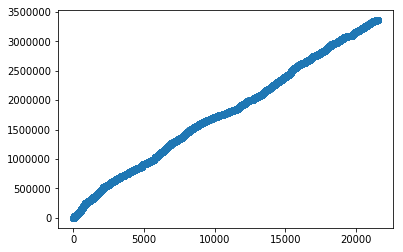

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

x, y = zip(*num_docs_num_unique)
plt.scatter(x, y)
plt.show()

In [13]:
most_to_least = sorted(counts_bigrams.items(), key=lambda item: item[1], reverse=True)
most_to_least_plot_items = []
for index, item in enumerate(most_to_least):
    most_to_least_plot_items.append((index, item[1]))

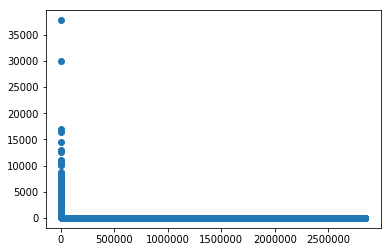

In [14]:
x, y = zip(*most_to_least_plot_items)
plt.scatter(x, y)
plt.show()

## Zipf's Law Bigrams

In [15]:
most_to_least_2 = sorted(counts_bigrams.items(), key=lambda item: item[1], reverse=True)
most_to_least_bigrams_2 = []
for index, item in enumerate(most_to_least):
    if index < 0:
        continue
    if index >= 300:
        break
    most_to_least_bigrams_2.append((index, item[1]))

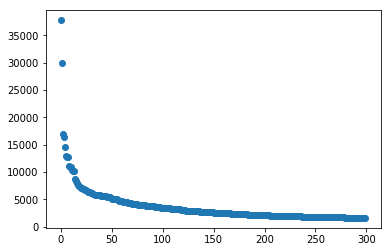

In [16]:
x2, y2 = zip(*most_to_least_bigrams_2)
plt.scatter(x2, y2)
plt.show()

## Stop Phrase lists

In [17]:
corpus_bigrams = set([i[0] for i in counts_bigrams.most_common(30)])

In [18]:
with open('../../processed_files/corpus_bigrams.pickle', 'wb') as file:
    pickle.dump(corpus_bigrams, file)